<a href="https://colab.research.google.com/github/wei-enwang/space-ham/blob/main/main_driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import nltk
from nltk.corpus import words
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils import data
from preprocess import WholeData, BalancedData

import models
import utils

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/weinwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nltk.download('words')

device = "cuda" if torch.cuda.is_available() else "cpu"
assert device == "cuda"   # use gpu whenever you can!

seed = 32
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

[nltk_data] Downloading package words to /home/weinwang/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [29]:
plot_yes = True

# use one dataset for now
train_data_dir = "./data/enron1/"
test_data_dir = "./data/enron2/"
output_dir = "./output/"

# hyperparameters
batch_size = 512
hidden_size = 128
num_layer = 3
dropout = 0.5
learning_rate = 1e-4
epochs = 30
max_len = 100

In [4]:
vocab = set([str.lower() for str in words.words()])

# train_dataset = WholeData(train_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
# test_dataset = WholeData(test_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
# Balanced dataset
train_dataset = BalancedData(train_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
test_dataset = BalancedData(test_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)

w2idx = train_dataset.src_v2id

embed = utils.load_pretrained_vectors(w2idx, "fastText/crawl-300d-2M.vec")
embed = torch.tensor(embed)

Number of ham emails: 1500, spam emails: 1500
Number of ham emails: 1496, spam emails: 1496
Loading pretrained vectors...
234378


0it [00:00, ?it/s]

There are 75835 / 234379 pretrained vectors found.


In [30]:
train_dataloader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, 
                                   num_workers=8, pin_memory=True)
test_dataloader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, 
                                  num_workers=8, pin_memory=True, drop_last=True)


In [31]:
model = models.spam_lstm(hidden_size=hidden_size, pretrained_embedding=embed, dropout=dropout).to(device)
loss_fn = nn.BCEWithLogitsLoss().to(device)
opt = Adam(model.parameters(), lr=learning_rate)

Using pretrained vectors...


  3%|▎         | 1/30 [00:01<00:34,  1.19s/it]

Epoch 0
-------------------------------
Training loss: 0.693543, avg accuracy: 0.500213
Testing loss: 0.693540, avg accuracy: 0.497266


  7%|▋         | 2/30 [00:02<00:34,  1.22s/it]

Epoch 1
-------------------------------
Training loss: 0.693266, avg accuracy: 0.500586
Testing loss: 0.693285, avg accuracy: 0.498437


 10%|█         | 3/30 [00:03<00:32,  1.21s/it]

Epoch 2
-------------------------------
Training loss: 0.693028, avg accuracy: 0.500000
Testing loss: 0.693213, avg accuracy: 0.496875


 13%|█▎        | 4/30 [00:04<00:31,  1.21s/it]

Epoch 3
-------------------------------
Training loss: 0.692946, avg accuracy: 0.504179
Testing loss: 0.693111, avg accuracy: 0.496875


 17%|█▋        | 5/30 [00:06<00:30,  1.22s/it]

Epoch 4
-------------------------------
Training loss: 0.692798, avg accuracy: 0.524065
Testing loss: 0.692986, avg accuracy: 0.503125


 20%|██        | 6/30 [00:07<00:29,  1.21s/it]

Epoch 5
-------------------------------
Training loss: 0.692645, avg accuracy: 0.540844
Testing loss: 0.692881, avg accuracy: 0.557422


 23%|██▎       | 7/30 [00:08<00:27,  1.22s/it]

Epoch 6
-------------------------------
Training loss: 0.692308, avg accuracy: 0.565927
Testing loss: 0.692740, avg accuracy: 0.592969


 27%|██▋       | 8/30 [00:09<00:26,  1.21s/it]

Epoch 7
-------------------------------
Training loss: 0.691946, avg accuracy: 0.563926
Testing loss: 0.692526, avg accuracy: 0.565234


 30%|███       | 9/30 [00:10<00:25,  1.22s/it]

Epoch 8
-------------------------------
Training loss: 0.691447, avg accuracy: 0.558464
Testing loss: 0.692210, avg accuracy: 0.543750


 33%|███▎      | 10/30 [00:12<00:24,  1.21s/it]

Epoch 9
-------------------------------
Training loss: 0.690497, avg accuracy: 0.558955
Testing loss: 0.691482, avg accuracy: 0.570312


 37%|███▋      | 11/30 [00:13<00:22,  1.21s/it]

Epoch 10
-------------------------------
Training loss: 0.688929, avg accuracy: 0.571147
Testing loss: 0.690345, avg accuracy: 0.585938


 40%|████      | 12/30 [00:14<00:21,  1.21s/it]

Epoch 11
-------------------------------
Training loss: 0.685600, avg accuracy: 0.586370
Testing loss: 0.688674, avg accuracy: 0.590234


 43%|████▎     | 13/30 [00:15<00:20,  1.21s/it]

Epoch 12
-------------------------------
Training loss: 0.678813, avg accuracy: 0.587648
Testing loss: 0.684772, avg accuracy: 0.597266


 47%|████▋     | 14/30 [00:16<00:19,  1.21s/it]

Epoch 13
-------------------------------
Training loss: 0.662724, avg accuracy: 0.590939
Testing loss: 0.679031, avg accuracy: 0.607422


 50%|█████     | 15/30 [00:18<00:18,  1.22s/it]

Epoch 14
-------------------------------
Training loss: 0.634991, avg accuracy: 0.603800
Testing loss: 0.684856, avg accuracy: 0.642969


 53%|█████▎    | 16/30 [00:19<00:17,  1.22s/it]

Epoch 15
-------------------------------
Training loss: 0.587166, avg accuracy: 0.677539
Testing loss: 0.678008, avg accuracy: 0.631641


 57%|█████▋    | 17/30 [00:20<00:15,  1.21s/it]

Epoch 16
-------------------------------
Training loss: 0.498863, avg accuracy: 0.767543
Testing loss: 0.605996, avg accuracy: 0.789844


 60%|██████    | 18/30 [00:21<00:14,  1.21s/it]

Epoch 17
-------------------------------
Training loss: 0.395659, avg accuracy: 0.864317
Testing loss: 0.572041, avg accuracy: 0.815625


 63%|██████▎   | 19/30 [00:23<00:13,  1.23s/it]

Epoch 18
-------------------------------
Training loss: 0.344438, avg accuracy: 0.895111
Testing loss: 0.571469, avg accuracy: 0.827344


 67%|██████▋   | 20/30 [00:24<00:12,  1.22s/it]

Epoch 19
-------------------------------
Training loss: 0.323831, avg accuracy: 0.902764
Testing loss: 0.475936, avg accuracy: 0.840234


 70%|███████   | 21/30 [00:25<00:11,  1.22s/it]

Epoch 20
-------------------------------
Training loss: 0.296287, avg accuracy: 0.901409
Testing loss: 0.466472, avg accuracy: 0.848047


 73%|███████▎  | 22/30 [00:26<00:09,  1.23s/it]

Epoch 21
-------------------------------
Training loss: 0.264205, avg accuracy: 0.920668
Testing loss: 0.469755, avg accuracy: 0.846875


 77%|███████▋  | 23/30 [00:28<00:08,  1.23s/it]

Epoch 22
-------------------------------
Training loss: 0.249480, avg accuracy: 0.928859
Testing loss: 0.432254, avg accuracy: 0.857812


 80%|████████  | 24/30 [00:29<00:07,  1.23s/it]

Epoch 23
-------------------------------
Training loss: 0.229152, avg accuracy: 0.932268
Testing loss: 0.400508, avg accuracy: 0.867578


 83%|████████▎ | 25/30 [00:30<00:06,  1.22s/it]

Epoch 24
-------------------------------
Training loss: 0.213056, avg accuracy: 0.940294
Testing loss: 0.396369, avg accuracy: 0.869922


 87%|████████▋ | 26/30 [00:31<00:04,  1.21s/it]

Epoch 25
-------------------------------
Training loss: 0.184353, avg accuracy: 0.951367
Testing loss: 0.378307, avg accuracy: 0.877344


 90%|█████████ | 27/30 [00:32<00:03,  1.22s/it]

Epoch 26
-------------------------------
Training loss: 0.170210, avg accuracy: 0.955202
Testing loss: 0.407276, avg accuracy: 0.875000


 93%|█████████▎| 28/30 [00:34<00:02,  1.23s/it]

Epoch 27
-------------------------------
Training loss: 0.222870, avg accuracy: 0.937038
Testing loss: 0.395985, avg accuracy: 0.876563


 97%|█████████▋| 29/30 [00:35<00:01,  1.22s/it]

Epoch 28
-------------------------------
Training loss: 0.209654, avg accuracy: 0.933026
Testing loss: 0.419111, avg accuracy: 0.869531


100%|██████████| 30/30 [00:36<00:00,  1.22s/it]

Epoch 29
-------------------------------
Training loss: 0.171639, avg accuracy: 0.953522
Testing loss: 0.429820, avg accuracy: 0.874609


Final testing loss: 0.435348, testing accuracy: 0.873047
Ham Precision: 0.938701, Recall: 0.799065, F1 score: 0.863273.
Ham Precision: 0.824131, Recall: 0.947492, F1 score: 0.881517.


(0.17163918167352676, 0.43534818291664124)

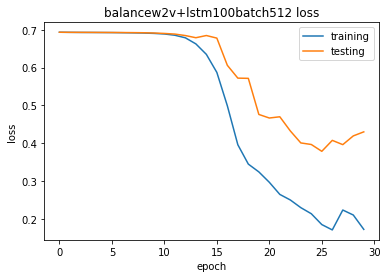

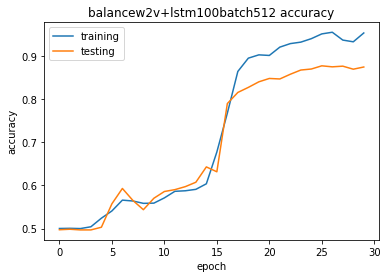

In [32]:
utils.train_test_scheme(train_dataloader, test_dataloader, model, loss_fn, opt, 
                        task_name="balancew2v+lstm100batch512extra", epochs=epochs, 
                        vis=plot_yes, print_every=1, img_dir=output_dir)



In [8]:
#torch.save(model.state_dict(), output_dir+"balancew2v_lstm100batch32.pt")

In [9]:
#test_message = "Subject: Look, I understand everything, but this is a frank bust... Look here and tell me your opinion"

In [10]:
# from preprocess import clean_string
# context = clean_string(test_message)
# sent_id = [0 for _ in range(max_len)]
# for i, w in enumerate(context):
#     if i >= max_len:
#         break
#     if w not in train_dataset.vocab:
#         w = '<unk>'
#     sent_id[i] = train_dataset.src_v2id[w]
# sent_id = torch.unsqueeze(torch.tensor(sent_id),dim=0).to(device)

In [11]:
# model.eval()
# print(f"Email message: \"{test_message}\"")
# with torch.no_grad():
#     pred = nn.Sigmoid()(model(sent_id))
#     pred = torch.squeeze(pred)

#     if pred > 0.5:
#         print("This is a ham email message.")
#     else:
#         print("This is a spam email message.")

# print(f"The probability of this email being a spam is {(1-pred)*100:.1f}%.")